## <center>PyTorch Tutorial<center>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt 
np.random.seed(73)

## <center> Linear Regression with Numpy<center>

### Data Generation

In [ ]:
# Data Generation
def generate_data(size = 100):

  x = np.random.rand(size, 1)
  y = 3 + 2.5 * x + .1 * np.random.randn(size, 1)

  # Shuffles the indices
  idx = np.arange(size)
  np.random.shuffle(idx)

  # split to train and validation 80:20
  split = int(size * 0.8)
  train_idx = idx[:split]
  val_idx = idx[split:]

  # Generate train and validation sets
  x_train, y_train = x[train_idx], y[train_idx]
  x_val, y_val = x[val_idx], y[val_idx]

  return x_train, y_train, x_val, y_val

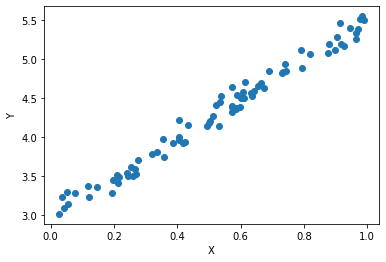

In [ ]:
x_train, y_train, x_val, y_val = generate_data()
plt.scatter(x_train, y_train)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Gradient Descent

Gradient descent consist of 3 basic steps : 

1. **Compute the Loss**

$$ \hat{y} = a + bx + \epsilon $$

$$ \text{MSE} = \frac{1}{N} \sum_{i} (y_i - \hat{y}_i)^2 $$

$$ \text{MSE} = \frac{1}{N} \sum_{i} (y_i - a - bx_i)^2 $$

2. **Compute the Gradients** : A gradient is a partial derivative. Using the chain rule the final expression came to be : 

$$\frac{\partial \text{MSE}}{\partial a} = \frac{\partial \text{MSE}}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial a} = -2 * \frac{1}{N} \sum_{i} (y_i - \hat{y}_i)$$

$$\frac{\partial \text{MSE}}{\partial b} = \frac{\partial \text{MSE}}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial b} = -2 * \frac{1}{N} \sum_{i} x_i(y_i - \hat{y}_i)$$

3. **Update the Parameters**

$$a = a - \alpha \frac{\partial \text{MSE}}{\partial a}$$

$$b = b - \alpha \frac{\partial \text{MSE}}{\partial b}$$

4. Repeat step 1 to 3 till convergence is reached

In [ ]:
# Initializes parameters "a" and "b" randomly

a = np.random.randn(1)
b = np.random.randn(1)

print(f"Initial values of [a, b] : [{a[0]}, {b[0]}]")

learning_rate = 1e-1 #learning rate
n_epochs = 1000

for epoch in range(n_epochs):
  
  # Step 1: Computes y hat
  yhat = a + b * x_train
  
  # Compute error and Loss using MSE 
  error = (y_train - yhat)
  loss = (error ** 2).mean()
  
  # Step 2: Compute gradients for both "a" and "b" parameters (partial derivatives)
  a_grad = -2 * error.mean()
  b_grad = -2 * (x_train * error).mean()
  
  # Step 3: Update parameters using gradients and the learning rate
  a = a - learning_rate * a_grad
  b = b - learning_rate * b_grad
    
print(f"Final values of [a, b] : [{a[0]}, {b[0]}]")

Initial values of [a, b] : [-1.389528167189103, 1.2528595392468875]
Final values of [a, b] : [2.9818223574919154, 2.506904792435268]


## <center> PyTorch Basics<center>

### Tensors 

* How to create a Tensor
* Operations on tensors
* Data types for Tensors

### Create a Tensor 

1. Create tensors from Numpy then see what operations can be applied.
**Note:** By default a tensor resides in cpu but can be sent to the GPU for fatser computations

In [ ]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'


<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.cuda.FloatTensor


### Dynamic Computation Graph

* Easily visualize a graph using `PyTorchViz` package. 

In [ ]:
!pip install torchviz 
from torchviz import make_dot


### Autograd & Optimizers

### Model

### Model Training 